In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import random as r

In [2]:
def num5(n):
    return '0' * (5 - len(str(n))) + str(n)

In [3]:
def model(arr, it): #, lim):
    maximum = arr[0]
    minimum = arr[0]
    for i in range(1, len(arr)):
        if arr[i] > maximum:
            maximum = arr[i]
        if arr[i] < minimum:
            minimum = arr[i]
    maxs = list()
    mins = list()
    for i in range(2, len(arr) - 1):
        if arr[i] > arr[i - 1] and arr[i] > arr[i + 1] and arr[i] > maximum * 0.7:
            maxs.append([arr[i], i + it])
        if arr[i - 1] >= arr[i] and arr[i + 1] > arr[i] and arr[i - 1] < arr[i - 2]  and arr[i] < minimum * 0.7:
            mins.append([arr[i], i + it])
    return maxs, mins

In [4]:
def learn_top(data, p, step, div):
    flag = 0
    tovar = list()
    l = div
    for i in range(p, len(data), l):
        analize = model(data[i:i + l], i)
        analize = analize[0]
        #print(analize)
        #plt.plot(np.arange(len(data))[i:i + l], data[i:i + l])
        #plt.show()
    
        count = 1
        for j in range(2 * step, len(analize), step):
            if (analize[j][1] - analize[j - step][1])/(analize[j - step][1] - analize[j - 2 * step][1]) > 0.75 and (analize[j][1] - analize[j - step][1])/(analize[j - step][1] - analize[j - 2 * step][1]) < 1/0.75:
                count += 1
        if count == len(analize) - 1 and count != 1 and (analize[-1][1] - analize[0][1])/l > 0.5:
            #flag = 1
            #for z in analize:
             #   tovar.append(z[0])
            #norm(tovar)
            #plt.plot(np.arange(len(data))[i:i + l], data[i:i + l])
            return True, 0 #var(tovar)
    try:
        analize = model(data[i + l:], i + l)
        analize = analize[0]
        count = 1
        for j in range(2 * step, len(analize), step):
            if (analize[j][1] - analize[j - step][1])/(analize[j - step][1] - analize[j - 2 * step][1]) > 0.75 and (analize[j][1] - analize[j - step][1])/(analize[j - step][1] - analize[j - 2 * step][1]) < 1/0.75:
                count += 1
        if count == len(analize) - 1 and count != 1 and (analize[-1][1] - analize[0][1])/l > 0.5:
            #flag = 1
            #for z in analize:
            #    tovar.append(z[0])
            #norm(tovar)
            #plt.plot(np.arange(len(data))[i:i + l], data[i:i + l])
            #plt.show()
            return True, 0 #var(tovar)
    except:
        return False, -1
    finally:
        return False, -1

def learn_bot(data, p, step, div):
    l = div
    flag = 0
    tovar = list()
    for i in range(p, len(data), l):
        analize = model(data[i:i + l], i)
        analize = analize[1]
        #plt.plot(np.arange(len(data))[i:i + 1500], data[i:i + 1500])
        #plt.show()
    
        count = 1
        for j in range(2 * step, len(analize), step):
            if (analize[j][1] - analize[j - step][1])/(analize[j - step][1] - analize[j - 2 * step][1]) > 0.75 and (analize[j][1] - analize[j - step][1])/(analize[j - step][1] - analize[j - 2 * step][1]) < 1/0.75:
                count += 1
        if count == len(analize) - 1 and count != 1 and (analize[-1][1] - analize[0][1])/l > 0.5:
            #flag = 1
            #for z in analize:
            #    tovar.append(z[0])
            #norm(tovar)
            #plt.plot(np.arange(len(data))[i:i + l], data[i:i + l])
            #print(step, analize)
            return True, 0 #var(tovar)
    try:
        analize = model(data[i + l:], i + l)
        analize = analize[1]
        count = 1
        for j in range(2 * step, len(analize), step):
            if (analize[j][1] - analize[j - step][1])/(analize[j - step][1] - analize[j - 2 * step][1]) > 0.75 and (analize[j][1] - analize[j - step][1])/(analize[j - step][1] - analize[j - 2 * step][1]) < 1/0.75:
                count += 1
        if count == len(analize) - 1 and count != 1 and (analize[-1][1] - analize[0][1])/l > 0.5:
            #flag = 1
            #for z in analize:
            #    tovar.append(z[0])
            #norm(tovar)
            #plt.plot(np.arange(len(data))[i:i + l], data[i:i + l])
            #plt.show()
            return True, 0 #var(tovar)
    except:
        return False, -1
    finally:
        return False, -1
def norm(arr):
    maximum = arr[0]
    minimum = arr[0]
    for i in range(1, len(arr)):
        if maximum < arr[i]:
            maximum = arr[i]
        if minimum > arr[i]:
            minimum = arr[i]
    for i in arr:
        i = (i - minimum)/(maximum - minimum)
def var(arr):
    summ = 0
    for i in range(1, len(arr)):
        summ += np.abs(arr[i] - arr[i - 1])
    return 1500 * summ/len(arr)

114


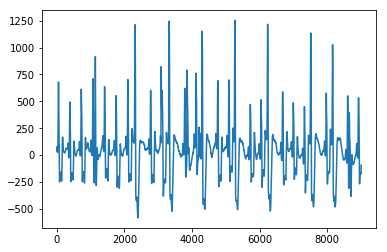

125


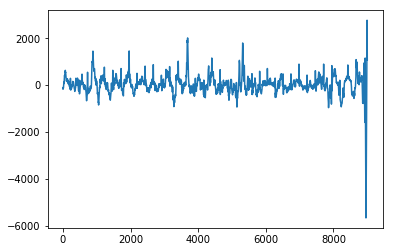

139


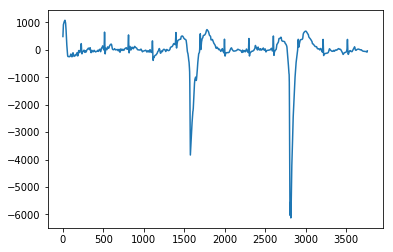

EOF


In [5]:
flag = 1
it = 1
t = list()
noise = list()
division = [500, 1000, 1500]
start = [0, 200, 400, 600, 800, 1000]
while flag:
    try:
        count = 0
        mat = scipy.io.loadmat('training2017/A' + num5(it) + '.mat')['val'][0]
        for div in division:
            for p in start:
                top = learn_top(mat, p, 1, div)
                bot = learn_bot(mat, p, 1, div)
                perem = top[0] or bot[0]
                if perem:
                    break
                top = learn_top(mat, p, 2, div)
                bot = learn_bot(mat, p, 2, div)
                perem = top[0] or bot[0]
                if perem:
                    break
                count += 1
            if perem:
                break
        if perem: # and top[1] < 600000:
            t.append([perem, top[1]])
        else:
            noise.append([perem, top[1]])
            print(it)
            plt.plot(np.arange(len(mat)), mat)
            plt.show()
        it += 1
    except:
        print('EOF')
        flag = 0

In [146]:
len(noise)

77

Далее для теста конкретного файла

In [138]:
flag = 1
it = 1
t = list()
noise = list()
division = [500, 1000, 1500]
start = [0, 200, 400, 600, 800, 1000]
if it:
    if it:
        count = 0
        mat = scipy.io.loadmat('training2017/A01246.mat')['val'][0] #
        for div in division:
            for p in start:
                top = learn_top(mat, p, 1, div)
                bot = learn_bot(mat, p, 1, div)
                perem = top[0] or bot[0]
                if perem:
                    break
                top = learn_top(mat, p, 2, div)
                bot = learn_bot(mat, p, 2, div)
                perem = top[0] or bot[0]
                if perem:
                    break
                count += 1
            if perem:
                break
        noise.append([perem, top[1]])
        #plt.plot(np.arange(len(mat)), mat)
        #plt.show()
        it += 1
        print(perem * 'ЭКГ' + (not perem) * 'ШУМ')

ШУМ
